# Texto Bruto (Com Header e Com Entrevistador)

In [44]:
# Carregar X_train e y_train
import os
import chardet

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

@UTF8
@PID:	11312/t-00002184-1
@Begin
@Languages:	eng
@Participants:	PAR Participant, INV Investigator
@ID:	eng|Pitt|PAR|74;|male|Control||Participant|||
@ID:	eng|Pitt|INV|||||Investigator|||
@Media:	S001, audio
*INV:	tell me everything that you see going on in that picture . 0_2360
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
*INV:	everything that you see happening . 2360_4266
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-P

In [4]:
# Carregar X_test
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)
print(x_test)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

["@UTF8\n@PID:\t11312/t-00002388-1\n@Begin\n@Languages:\teng\n@Participants:\tPAR Participant, INV Investigator\n@ID:\teng|Pitt|PAR|63;|female|_X_||Participant|_Y_||\n@ID:\teng|Pitt|INV|||||Investigator|||\n@Media:\tS160, audio\n*PAR:\t&uh this boy is about to fall off o(f) the stool . \x150_3957\x15\n%mor:\tdet:dem|this n|boy cop|be&3S adv|about inf|to v|fall adv|off\n\tprep|of det:art|the n|stool .\n%gra:\t1|2|DET 2|3|SUBJ 3|0|ROOT 4|6|JCT 5|6|INF 6|3|CPRED 7|6|JCT 8|6|JCT\n\t9|10|DET 10|8|POBJ 11|3|PUNCT\n*PAR:\tthe mother is &uh washing dishes and the water's spilling over on\n\tthe &uh (.) kitchen floor . \x153957_12857\x15\n%mor:\tdet:art|the n|mother aux|be&3S part|wash-PRESP n|dish-PL coord|and\n\tdet:art|the n|water~aux|be&3S part|spill-PRESP adv|over prep|on\n\tdet:art|the n|kitchen n|floor .\n%gra:\t1|2|DET 2|4|SUBJ 3|4|AUX 4|0|ROOT 5|4|OBJ 6|10|LINK 7|8|DET 8|10|SUBJ\n\t9|10|AUX 10|4|CJCT 11|10|JCT 12|10|JCT 13|15|DET 14|15|MOD 15|12|POBJ\n\t16|4|PUNCT\n*PAR:\tthe wind is b

In [28]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7708333333333334


    k  Test Set Accuracy
0   1           0.687500
1   3           0.750000
2   5           0.791667
3   7           0.770833
4   9           0.770833
5  11           0.770833
6  13           0.770833
7  15           0.770833
8  17           0.750000
9  19           0.687500
Best k value: 5
Accuracy on test set with best k: 0.7916666666666666


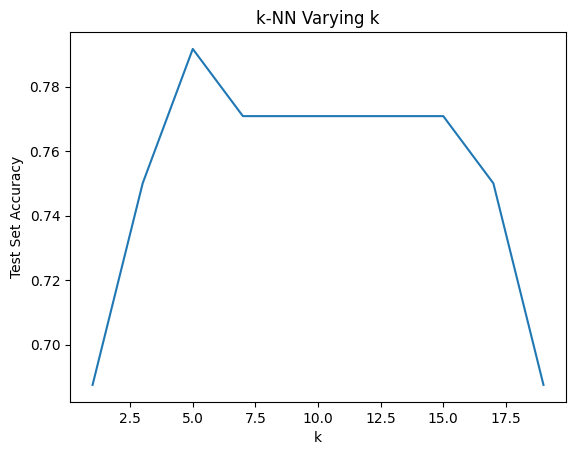

In [29]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Com Header e Sem Entrevistador

In [30]:
# Carregar X_train e y_train
import os
import chardet
import re

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

@UTF8
@PID:	11312/t-00002184-1
@Begin
@Languages:	eng
@Participants:	PAR Participant, INV Investigator
@ID:	eng|Pitt|PAR|74;|male|Control||Participant|||
@ID:	eng|Pitt|INV|||||Investigator|||
@Media:	S001, audio
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|J

In [31]:
# Carregar X_test
import os
import chardet
import re

# Função para carregar textos e remover texto entre *INV: e %
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [32]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.75


    k  Test Set Accuracy
0   1           0.625000
1   3           0.750000
2   5           0.791667
3   7           0.750000
4   9           0.729167
5  11           0.750000
6  13           0.750000
7  15           0.770833
8  17           0.708333
9  19           0.770833
Best k value: 5
Accuracy on test set with best k: 0.7916666666666666


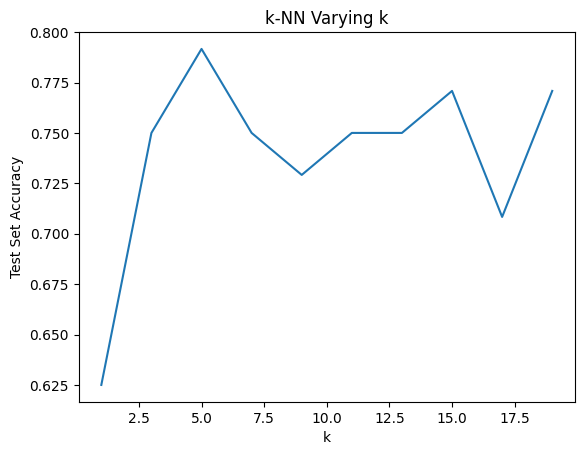

In [33]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Sem Header e Com Entrevistador

In [34]:
import os
import chardet

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                
                # Eliminar as primeiras 8 linhas
                lines = text.split('\n')
                text = '\n'.join(lines[8:])
                
                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

*INV:	tell me everything that you see going on in that picture . 0_2360
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
*INV:	everything that you see happening . 2360_4266
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|JCT 8|6|XJCT
	9|10|DET 10|8|OBJ 11|10|CONJ 12|13|DET 13|15|SUBJ 14|15|AUX 15|11|COORD

In [35]:
# Carregar X_test
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [36]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7291666666666666


    k  Test Set Accuracy
0   1           0.708333
1   3           0.687500
2   5           0.687500
3   7           0.729167
4   9           0.708333
5  11           0.708333
6  13           0.687500
7  15           0.666667
8  17           0.687500
9  19           0.666667
Best k value: 7
Accuracy on test set with best k: 0.7291666666666666


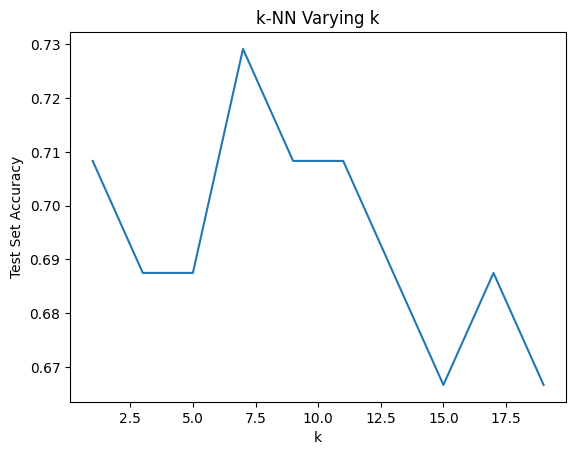

In [37]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Sem Header e Sem Entrevistador

In [38]:
# Carregar X_train e y_train
import os
import chardet
import re

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                # Eliminar as primeiras 8 linhas
                lines = text.split('\n')
                text = '\n'.join(lines[8:])

                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|JCT 8|6|XJCT
	9|10|DET 10|8|OBJ 11|10|CONJ 12|13|DET 13|15|SUBJ 14|15|AUX 15|11|COORD
	16|3|PUNCT
*PAR:	an(d) &uh the window's open . 13310_20608
%mor:	coord|and det:art|the adj|window&dn-POSS adj|open .
%gra:	1

In [39]:
# Carregar X_test
import os
import chardet
import re

# Função para carregar textos e remover texto entre *INV: e %
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [40]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7083333333333334


    k  Test Set Accuracy
0   1           0.708333
1   3           0.708333
2   5           0.687500
3   7           0.708333
4   9           0.750000
5  11           0.708333
6  13           0.666667
7  15           0.687500
8  17           0.666667
9  19           0.687500
Best k value: 9
Accuracy on test set with best k: 0.75


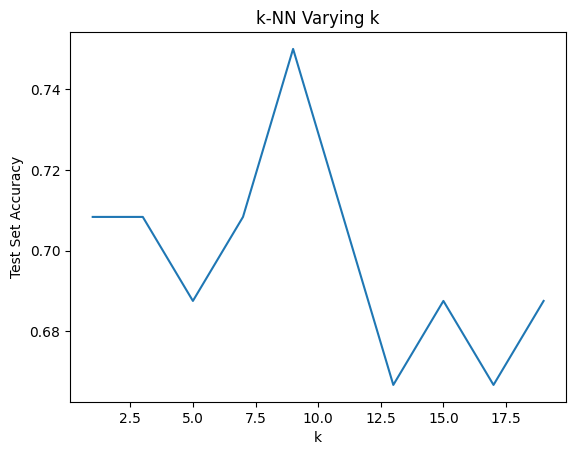

In [41]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Apenas Sequências Textuais do Paciente

### Concatenado

In [6]:
import os
import chardet
import re

def load_texts_from_directory(directory, label=None):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                # Process the text to extract *PAR lines
                par_text = extract_par_text(text)
                texts.append(par_text)
                if label is not None:
                    labels.append(label)
    return texts, labels

def extract_par_text(text):
    # Use regex to find lines that start with *PAR and capture the spoken part
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    # Concatenate the lines into a single string
    concatenated_text = " ".join(par_lines)
    # Remove any extra newline characters
    concatenated_text = concatenated_text.replace('\n', ' ')
    # Remove the series numbers enclosed in special characters
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

# Diretórios das pastas de treino
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos de treino
x_train = x_neg + x_pos
y_train = y_neg + y_pos

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test, _ = load_texts_from_directory(test_dir)

# Definir rótulos de teste
y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

print(x_train[0])
print(x_test[0])

well there's a mother standing there &uh &uh washing the dishes 	an(d) the sink is overspilling [: overflowing] [* s:r] .  an(d) &uh the window's open .  and outside the window there's a <walk with a> [//] &c curved walk 	with a garden .  and you can see another &uh &uh building there .  looks like a garage or something with curtains and the grass in the 	garden .  and there are dishes [//] &uh &uh two cups and a saucer on the sink 	.  and &uh she's getting her feet wet from the overflow of the water 	from the sink .  she seems to be oblivious to the fact that the &s sink is 	overflowing .  she's also oblivious to the fact that her kids are stealin(g) 	cookies out o(f) the cookie jar .  and the kid on the stool is gonna fall off the stool .  he's standing up there in the cupboard takin(g) cookies out o(f) 	the jar, handin(g) them to his [//] &uh a girl about the same age . 	 the kids are somewhere around seven or eight years old or nine .  an(d) the mother is gonna get shocked <when th

    k  Test Set Accuracy
0   1           0.750000
1   3           0.833333
2   5           0.833333
3   7           0.791667
4   9           0.729167
5  11           0.770833
6  13           0.770833
7  15           0.750000
8  17           0.770833
9  19           0.770833
Best k value: 3
Accuracy on test set with best k: 0.8333333333333334


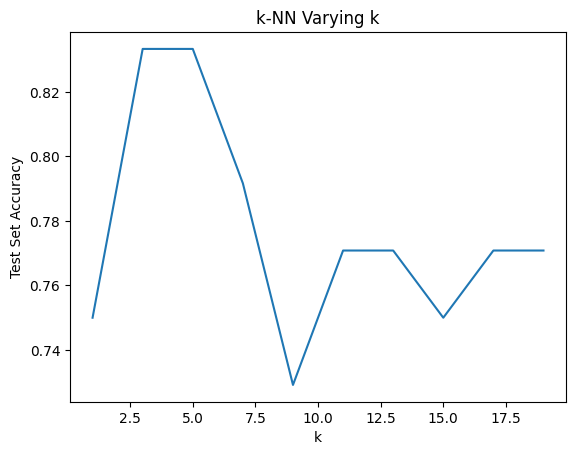

In [7]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### Não concatenado

In [20]:
import os
import chardet
import re
import numpy as np

def load_texts_from_directory(directory, label=None):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                # Process the text to extract *PAR lines
                par_texts = extract_par_texts(text)
                texts.extend(par_texts)  # Add all utterances to texts
                if label is not None:
                    labels.extend([label] * len(par_texts))  # Add label for each utterance
    return texts, labels

def extract_par_texts(text):
    # Use regex to find lines that start with *PAR and capture the spoken part
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    par_texts = []
    for line in par_lines:
        # Remove any extra newline characters
        line = line.replace('\n', ' ')
        # Remove the series numbers enclosed in special characters
        cleaned_line = re.sub(r'\\d+_\d+\', '', line)
        par_texts.append(cleaned_line.strip())
    return par_texts

# Diretórios das pastas de treino
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos de treino
x_train = x_neg + x_pos
y_train = y_neg + y_pos

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Rótulos de teste manualmente atribuídos
y_test_manual = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

# Carregar textos de teste e ajustar rótulos
x_test = []
y_test = []
label_index = 0

for filename in os.listdir(test_dir):
    if filename.endswith(".cha"):
        file_path = os.path.join(test_dir, filename)
        with open(file_path, 'rb') as file:
            raw_data = file.read()
            result = chardet.detect(raw_data)
            text = raw_data.decode(result['encoding'])
            # Process the text to extract *PAR lines
            par_texts = extract_par_texts(text)
            x_test.extend(par_texts)  # Add all utterances to texts
            if label_index < len(y_test_manual):
                y_test.extend([y_test_manual[label_index]] * len(par_texts))  # Add label for each utterance
                label_index += 1

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(1492,)
(1492,)
(590,)
(590,)


    k  Test Set Accuracy
0   1           0.567797
1   3           0.572881
2   5           0.596610
3   7           0.637288
4   9           0.632203
5  11           0.600000
6  13           0.613559
7  15           0.622034
8  17           0.611864
9  19           0.615254
Best k value: 7
Accuracy on test set with best k: 0.6372881355932203


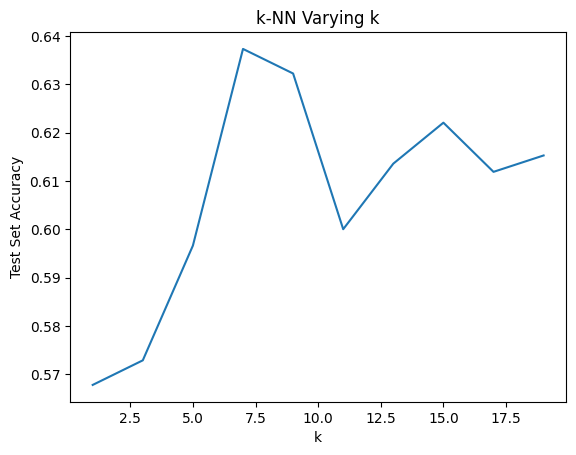

In [22]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

## BERT

In [3]:
import os
import chardet
import re
import numpy as np

def load_texts_from_directory(directory, label=None):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                # Process the text to extract *PAR lines
                par_text = extract_par_text(text)
                texts.append(par_text)
                if label is not None:
                    labels.append(label)
    return texts, labels

def extract_par_text(text):
    # Use regex to find lines that start with *PAR and capture the spoken part
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    # Concatenate the lines into a single string
    concatenated_text = " ".join(par_lines)
    # Remove any extra newline characters
    concatenated_text = concatenated_text.replace('\n', ' ')
    # Remove the series numbers enclosed in special characters
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

# Diretórios das pastas de treino
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos de treino
x_train = x_neg + x_pos
y_train = y_neg + y_pos

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test, _ = load_texts_from_directory(test_dir)

# Definir rótulos de teste
y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))
print(x_train)
print(y_train)
print(x_test)
print(y_test)

(108,)
(108,)
(48,)
(48,)
["well there's a mother standing there &uh &uh washing the dishes \tan(d) the sink is overspilling [: overflowing] [* s:r] .  an(d) &uh the window's open .  and outside the window there's a <walk with a> [//] &c curved walk \twith a garden .  and you can see another &uh &uh building there .  looks like a garage or something with curtains and the grass in the \tgarden .  and there are dishes [//] &uh &uh two cups and a saucer on the sink \t.  and &uh she's getting her feet wet from the overflow of the water \tfrom the sink .  she seems to be oblivious to the fact that the &s sink is \toverflowing .  she's also oblivious to the fact that her kids are stealin(g) \tcookies out o(f) the cookie jar .  and the kid on the stool is gonna fall off the stool .  he's standing up there in the cupboard takin(g) cookies out o(f) \tthe jar, handin(g) them to his [//] &uh a girl about the same age . \t the kids are somewhere around seven or eight years old or nine .  an(d) the

In [4]:
import ktrain
from ktrain import text

# Preparar dados para ktrain
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                      x_test=x_test, y_test=y_test,
                                                                      class_names=['0', '1'],
                                                                      preprocess_mode='bert')
# Definir variáveis trn e val
trn = (x_train, y_train)
val = (x_test, y_test)

# Imprimir formas das variáveis para verificação
print(f'trn: {np.shape(trn[0])}, {np.shape(trn[1])}')
print(f'val: {np.shape(val[0])}, {np.shape(val[1])}')
print(preproc)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification
trn: (2, 108, 400), (108, 2)
val: (2, 48, 400), (48, 2)


In [5]:
model = text.text_classifier('bert', trn, preproc=preproc)

Is Multi-Label? False
maxlen is 400


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [6]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [7]:
learner.fit_onecycle(5e-5, 4)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/4


ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/Encoder-6-FeedForward/mul_5' defined at (most recent call last):
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11328\3221294247.py", line 1, in <module>
      learner.fit_onecycle(5e-5, 4)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ktrain\core.py", line 1047, in fit_onecycle
      hist = self.fit(
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\ktrain\core.py", line 1405, in fit
      hist = self.model.fit(
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras_position_wise_feed_forward\feed_forward.py", line 117, in call
      if self.activation is not None:
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras_position_wise_feed_forward\feed_forward.py", line 118, in call
      h = self.activation(h)
    File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras_transformer\gelu.py", line 11, in gelu
      return 0.5 * x * (1.0 + K.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * x * x * x)))
Node: 'model_1/Encoder-6-FeedForward/mul_5'
OOM when allocating tensor with shape[8,400,3072] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node model_1/Encoder-6-FeedForward/mul_5}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_34920]

# Análises Adicionais (trabalhando)

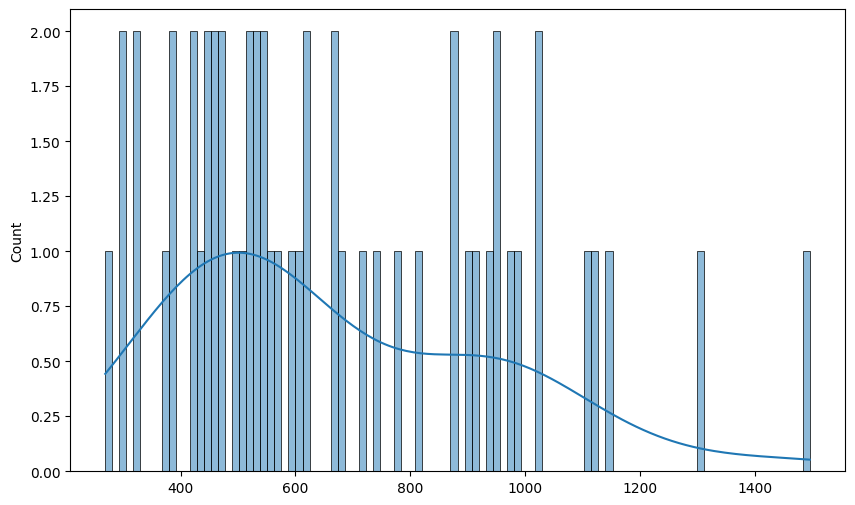

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule o comprimento de cada valor em x_neg
x_neg_len = [len(x) for x in x_neg]

# Crie a figura
plt.figure(figsize=(10, 6))

# Plote o histograma
sns.histplot(x_neg_len, bins=100, kde=True)

# Mostre o gráfico
plt.show()

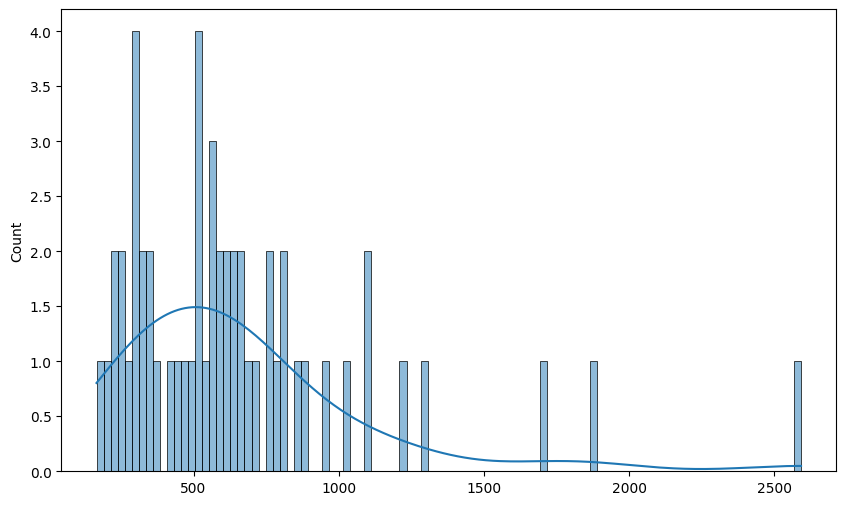

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule o comprimento de cada valor em x_neg
x_pos_len = [len(x) for x in x_pos]

# Crie a figura
plt.figure(figsize=(10, 6))

# Plote o histograma
sns.histplot(x_pos_len, bins=100, kde=True)

# Defina os limites do eixo x
#plt.xlim(0, 10000)

# Mostre o gráfico
plt.show()

(108, 108)


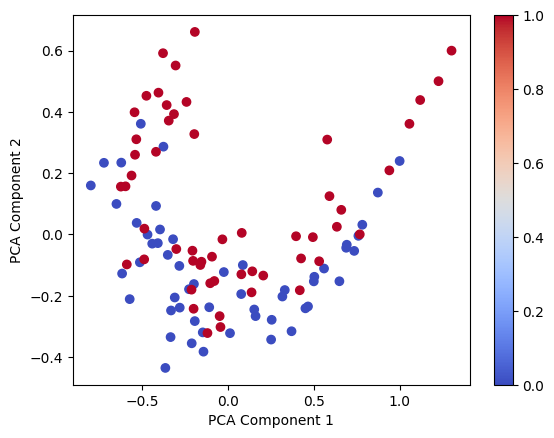

In [11]:
import numpy as np

train_ncd_arrays = np.array(train_ncd)
print(train_ncd_arrays.shape)

%matplotlib inline

# clear matplotlib figure
plt.clf()

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_ncd_arrays)

plt.scatter(train_pca[:,0], train_pca[:,1], c=y_train, cmap='coolwarm')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()